# HW3 - Clusterisation

## 0. Загрузка библиотек и данных

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn import metrics
from scipy.spatial.distance import pdist

In [5]:
osteo_data = pd.read_csv('column_3C_weka.csv', sep = ',')
osteo_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


## 1. Нарисуйте Scatter-Plot для базовой классификации (данные лежат в переменной class)

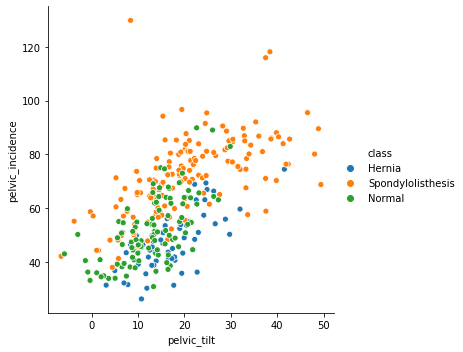

In [6]:
sns.relplot(x = 'pelvic_tilt', 
            y = 'pelvic_incidence', 
            hue='class', data = osteo_data)

## 2. Оцените, какое количество кластеров будет оптимальным для этих данных. Изобразите график.

Уберём колонку class.

In [7]:
osteo_data_without_class = osteo_data.drop(['class'], axis=1)

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(osteo_data_without_class)
    Sum_of_squared_distances.append(km.inertia_)


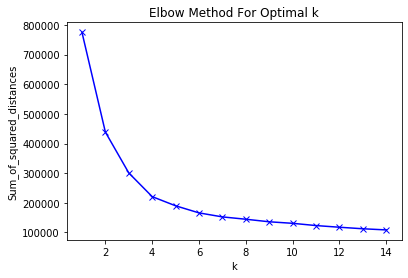

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Согласно графику, оптимальное число кластеров равно 4.

## 3. Напишите классификатор Kmeans на основании данных об оптимальном числе кластеров, проведите кластеризацию на ваших данных. Визуализируйте полученные результаты и отразите центроиды на графике.

Проведём кластеризацию с оптимальныч числом кластеров.

In [89]:
k_means_osteo = KMeans(n_clusters=4,  n_init=10, init='random', max_iter=100000)
y_kmeans = k_means_osteo.fit_predict(osteo_data_without_class)
osteo_data_without_class['y_kmeans'] = k_means_osteo.fit_predict(osteo_data_without_class)
osteo_data_without_class

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,y_kmeans
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


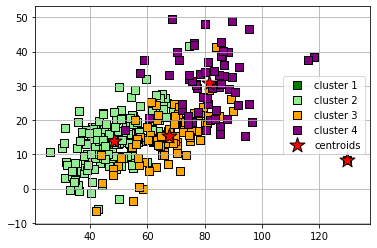

In [93]:
plt.scatter(
    osteo_data_without_class['pelvic_incidence'][y_kmeans == 0], 
    osteo_data_without_class['pelvic_tilt'][y_kmeans == 0],
    s=50, c='green',
    marker='s', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    osteo_data_without_class['pelvic_incidence'][y_kmeans == 1], 
    osteo_data_without_class['pelvic_tilt'][y_kmeans == 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    osteo_data_without_class['pelvic_incidence'][y_kmeans == 2], 
    osteo_data_without_class['pelvic_tilt'][y_kmeans == 2],
    s=50, c='orange',
    marker='s', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    osteo_data_without_class['pelvic_incidence'][y_kmeans == 3], 
    osteo_data_without_class['pelvic_tilt'][y_kmeans == 3],
    s=50, c='purple',
    marker='s', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    k_means_osteo.cluster_centers_[:, 0], k_means_osteo.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()



## 4-5 Напишите иерархический классификатор (агломеративный алгоритм) , попробуйте подобрать метод, который лучше всего будет кластеризовать. Визуализируйте полученные результаты иерархической кластеризации. Предположите, какой из них работает лучше всего. 

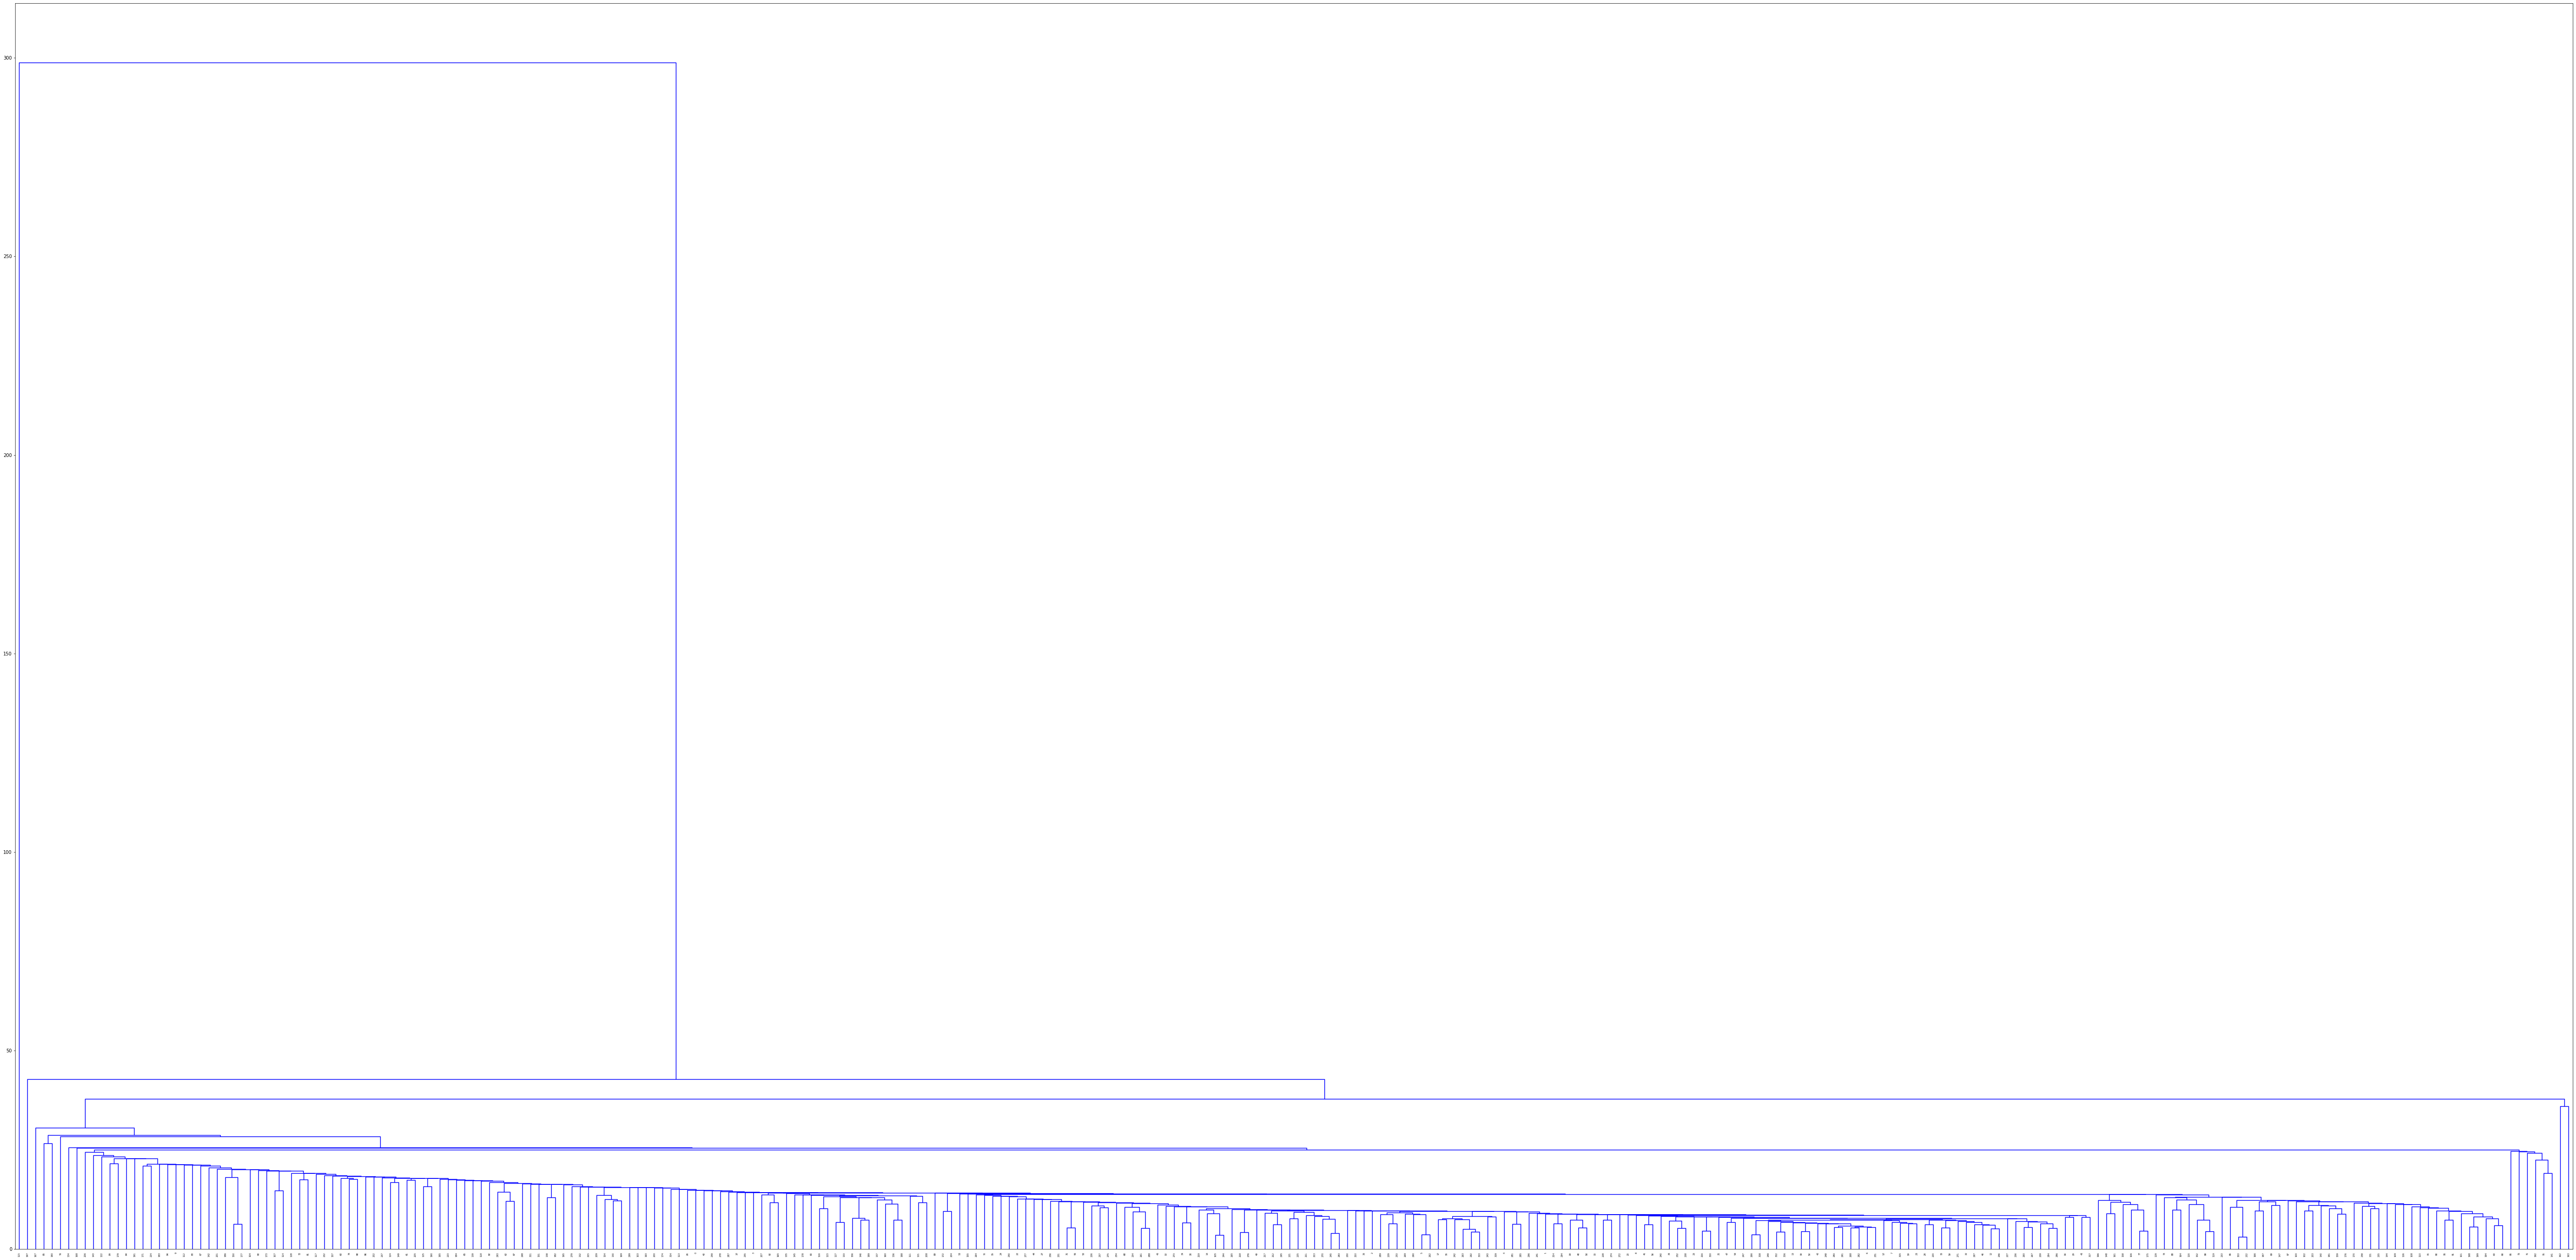

In [106]:
distance_mat = pdist(osteo_data_without_class)
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(100, 50))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

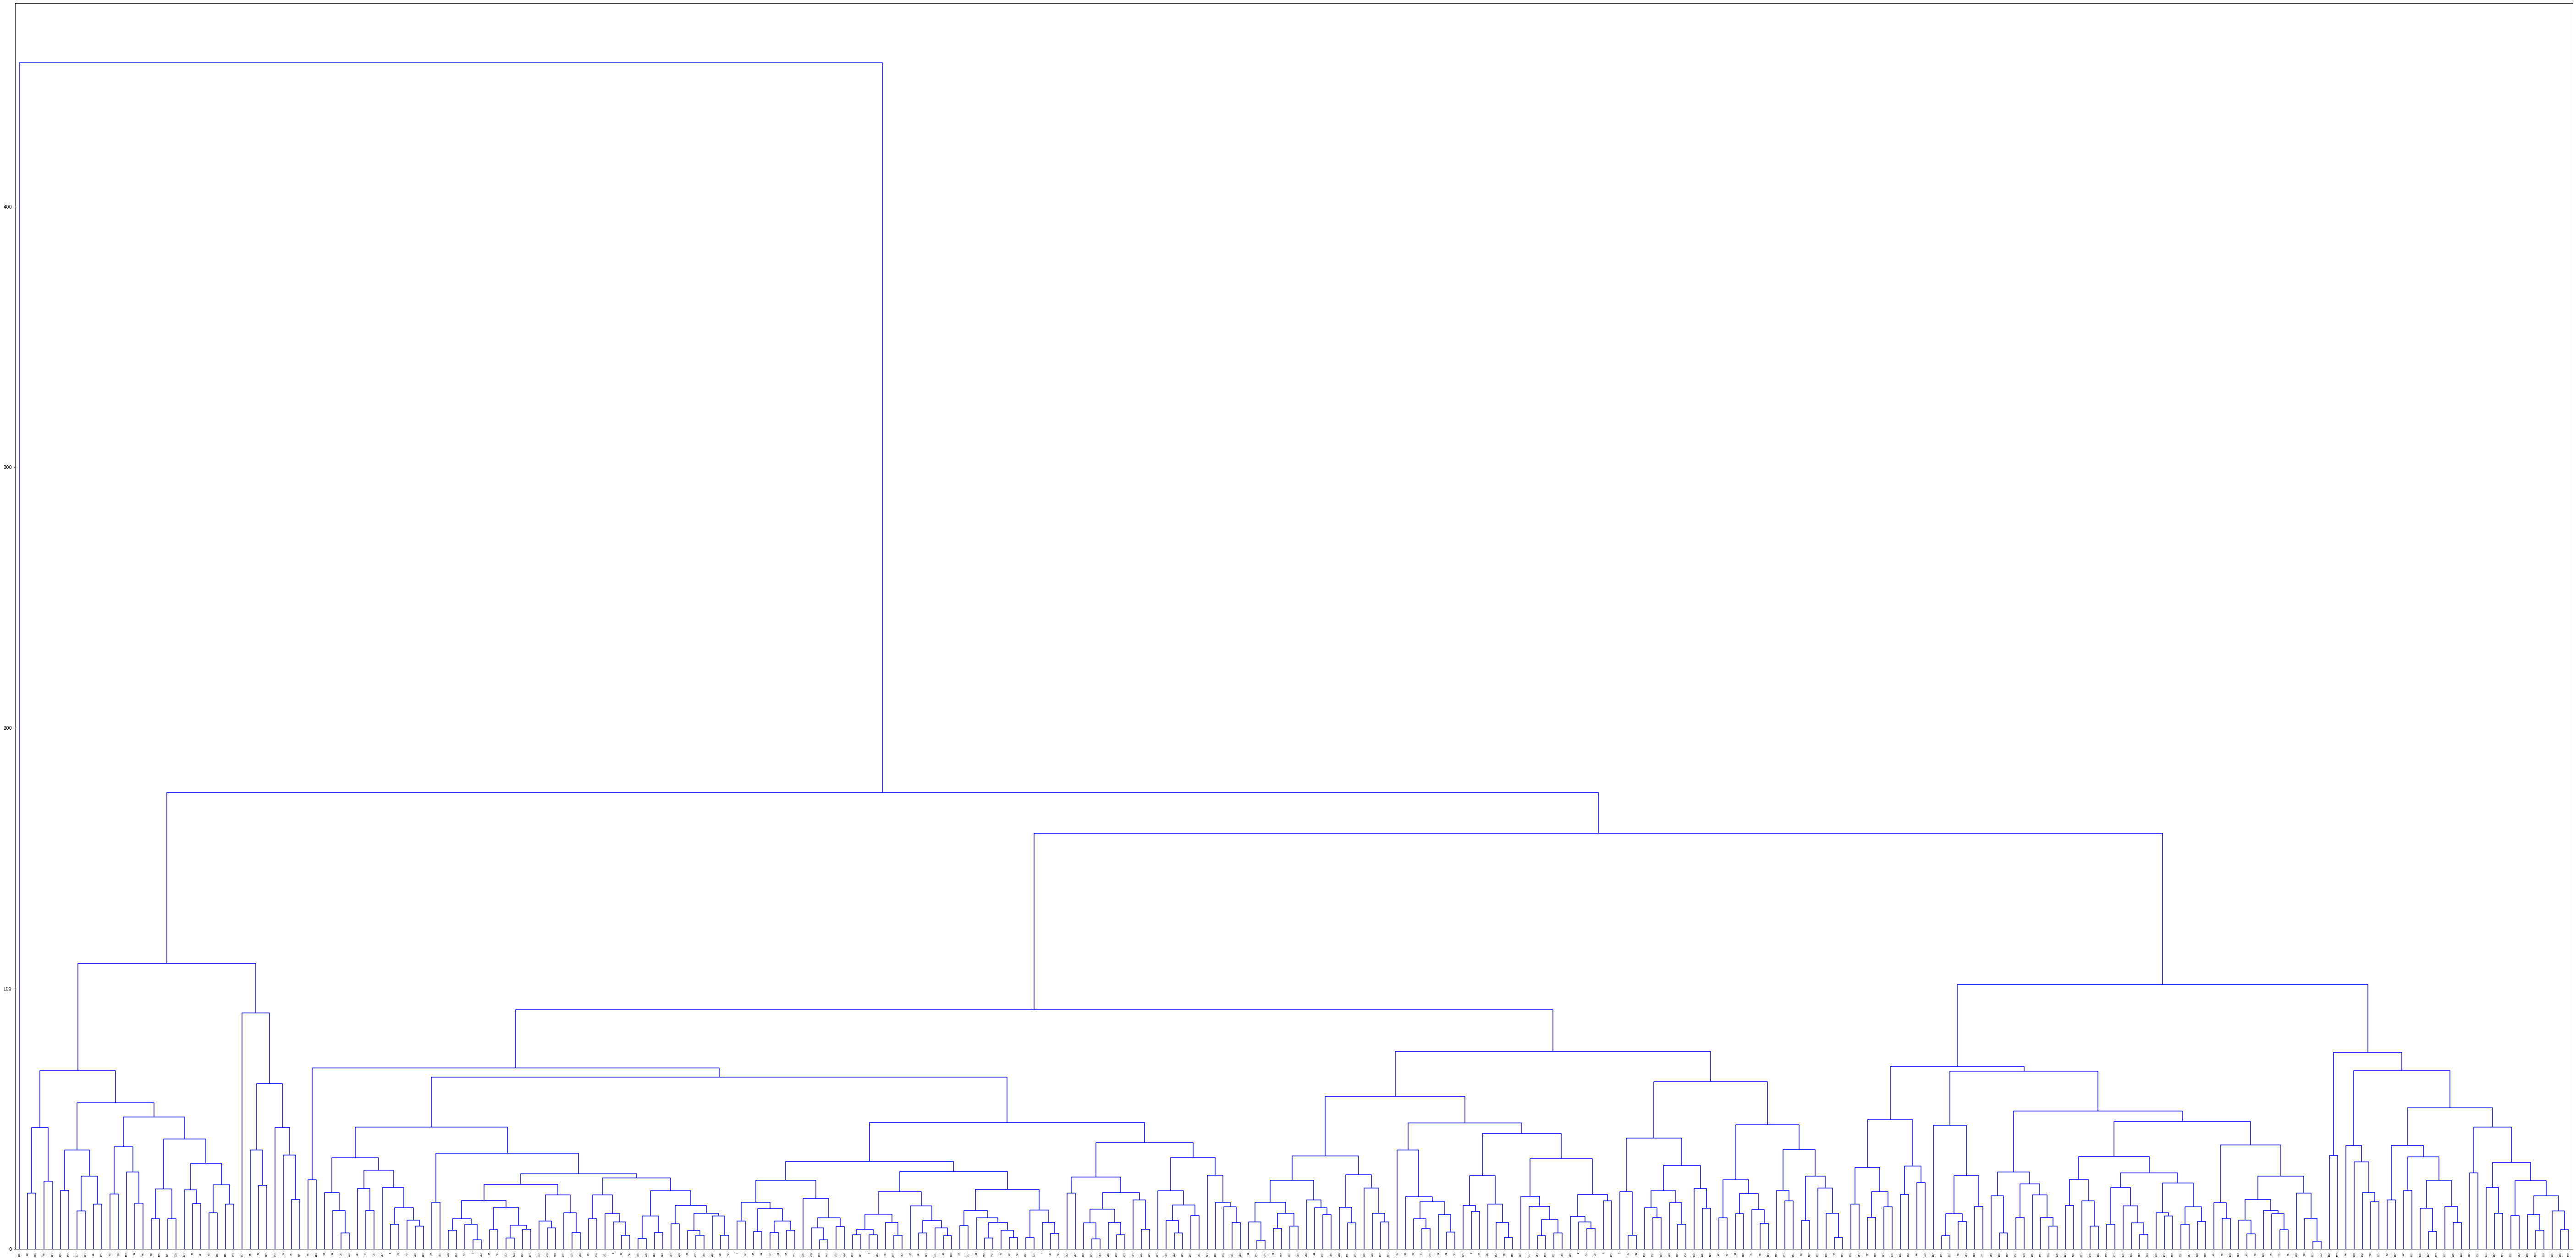

In [107]:
distance_mat = pdist(osteo_data_without_class)
Z = hierarchy.linkage(distance_mat, 'complete')
plt.figure(figsize=(100, 50))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

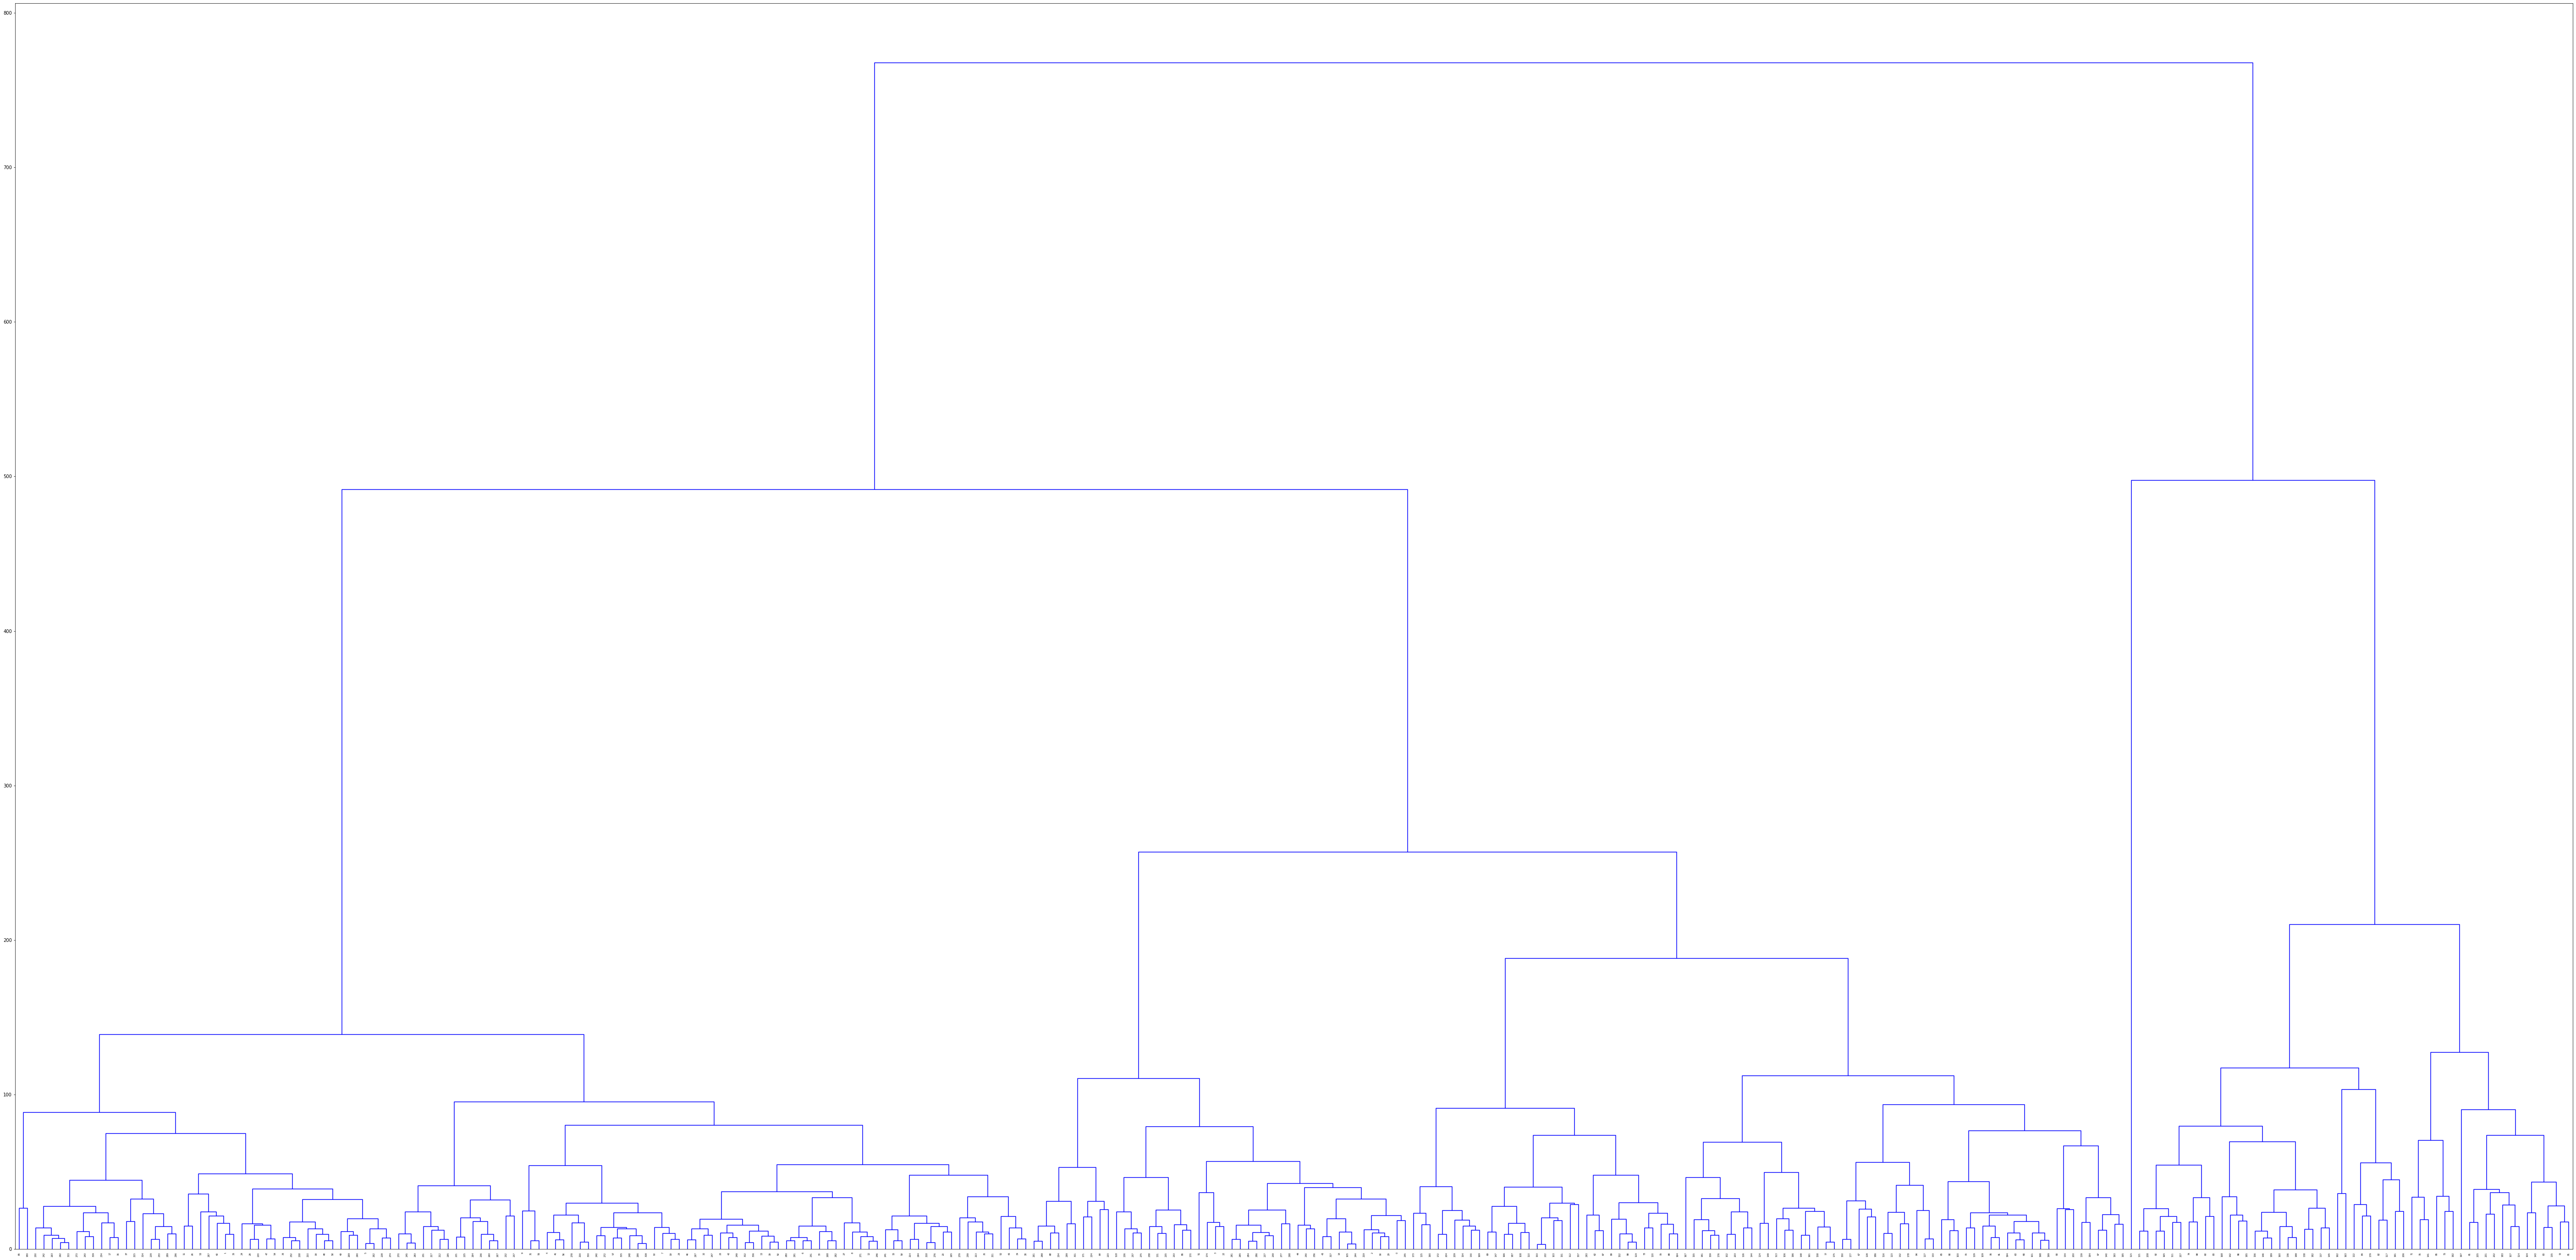

In [110]:
distance_mat = pdist(osteo_data_without_class)
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(100, 50))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

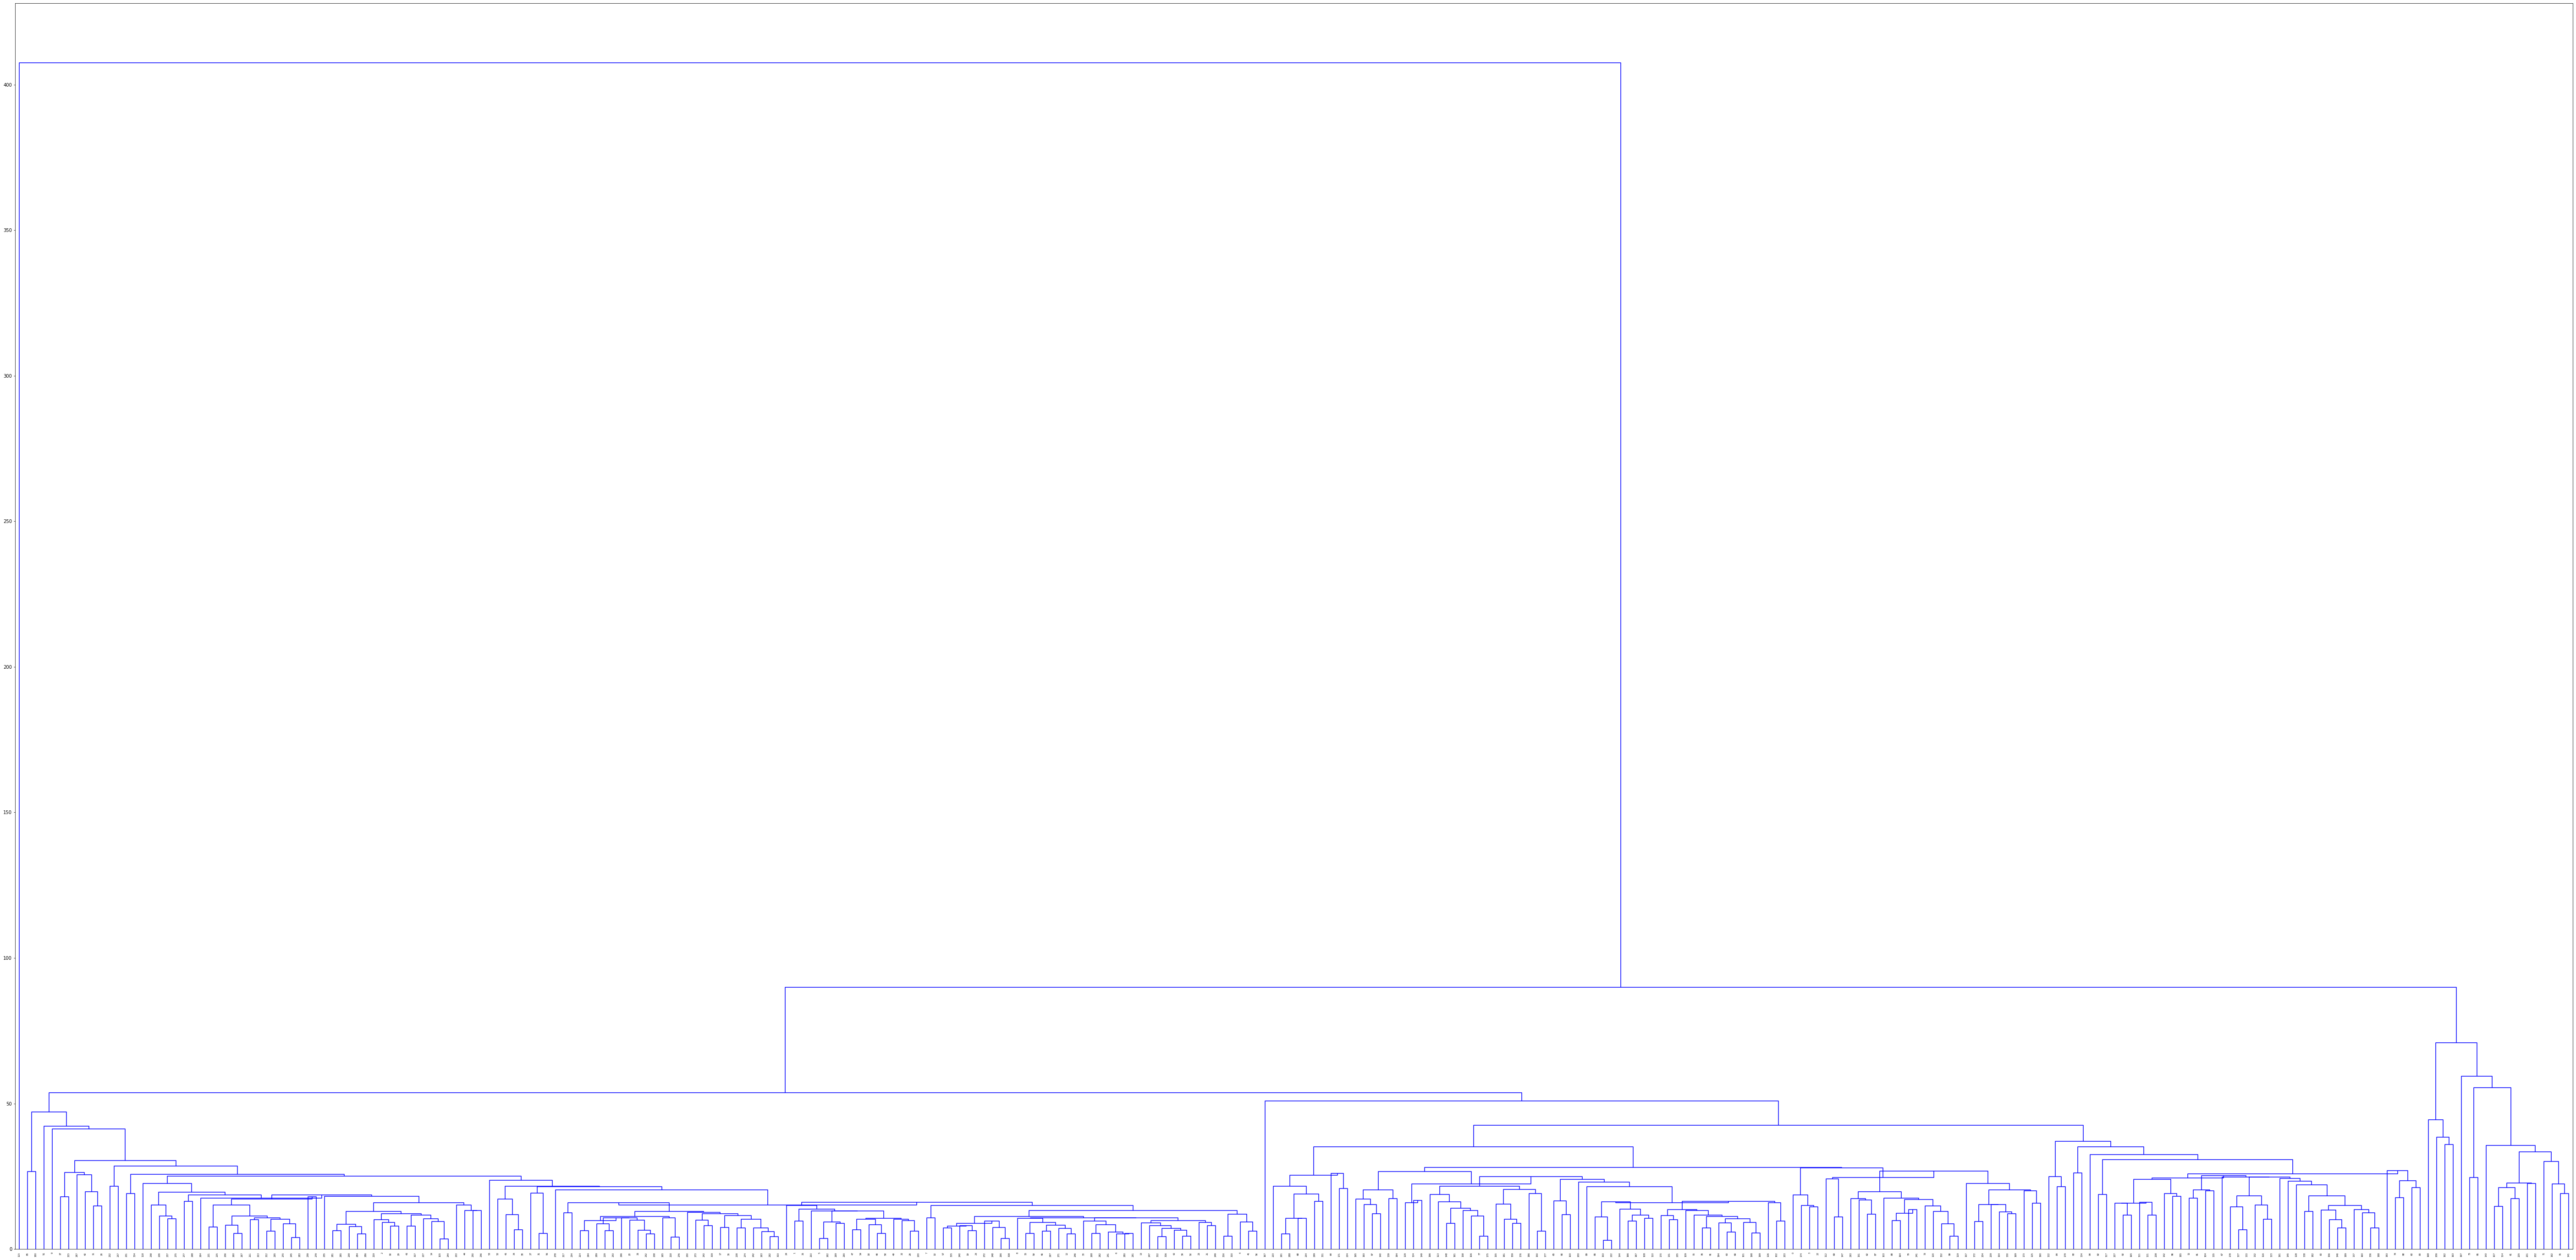

In [111]:
distance_mat = pdist(osteo_data_without_class)
Z = hierarchy.linkage(distance_mat, 'centroid')
plt.figure(figsize=(100, 50))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

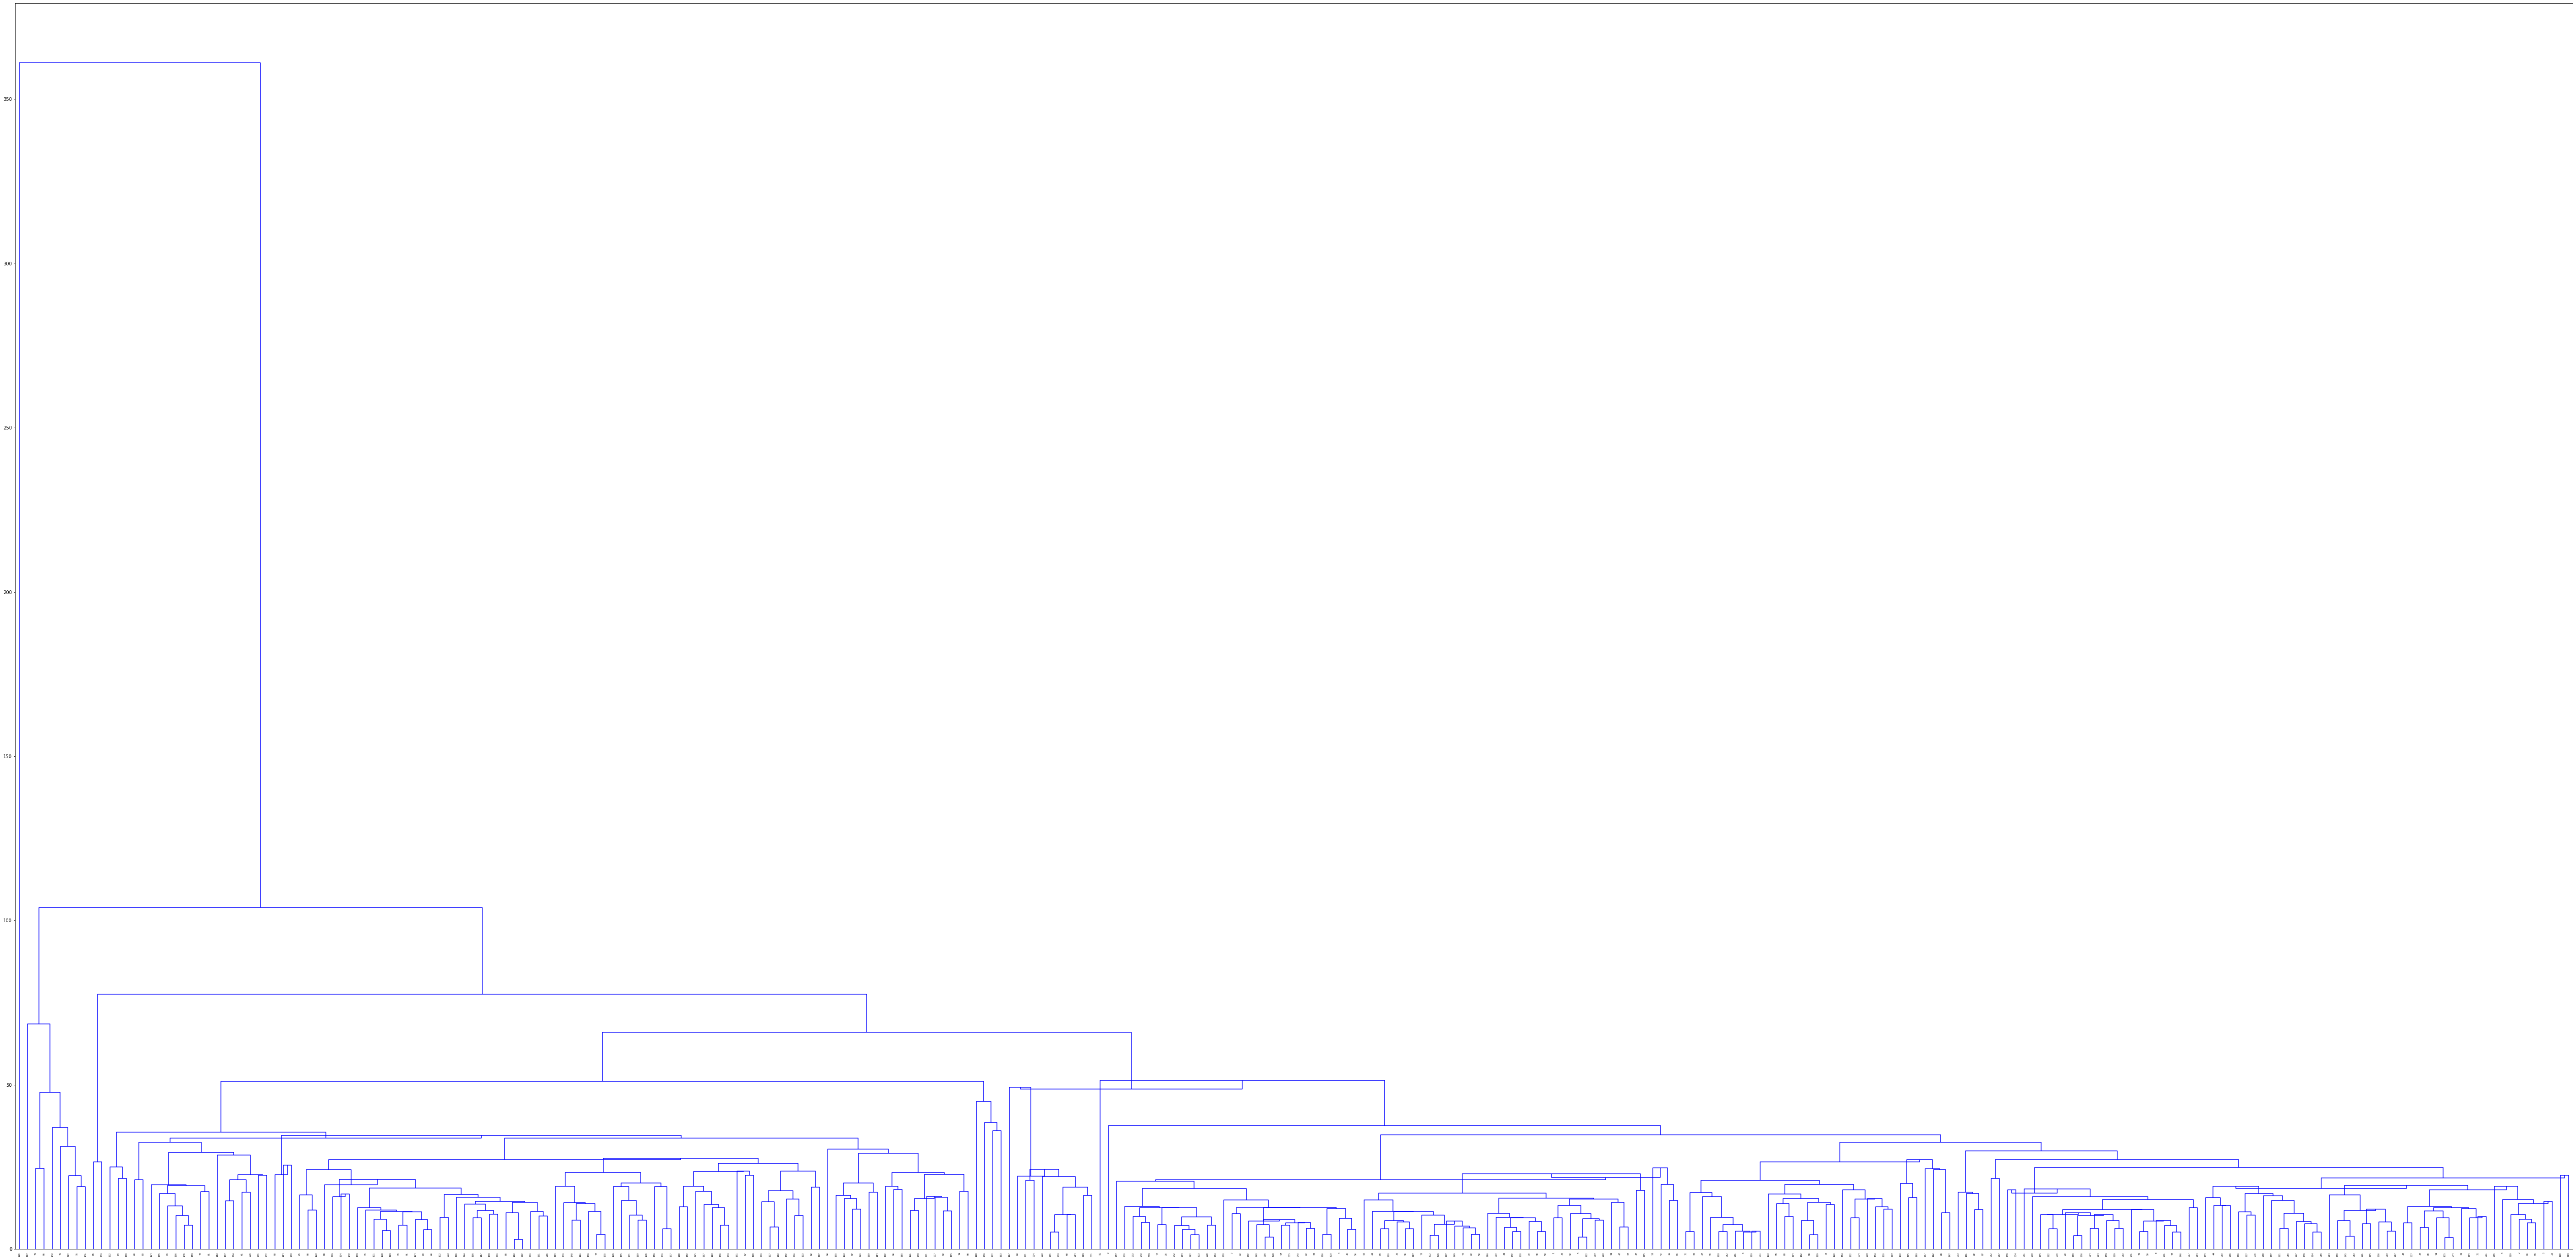

In [112]:
distance_mat = pdist(osteo_data_without_class)
Z = hierarchy.linkage(distance_mat, 'median')
plt.figure(figsize=(100, 50))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

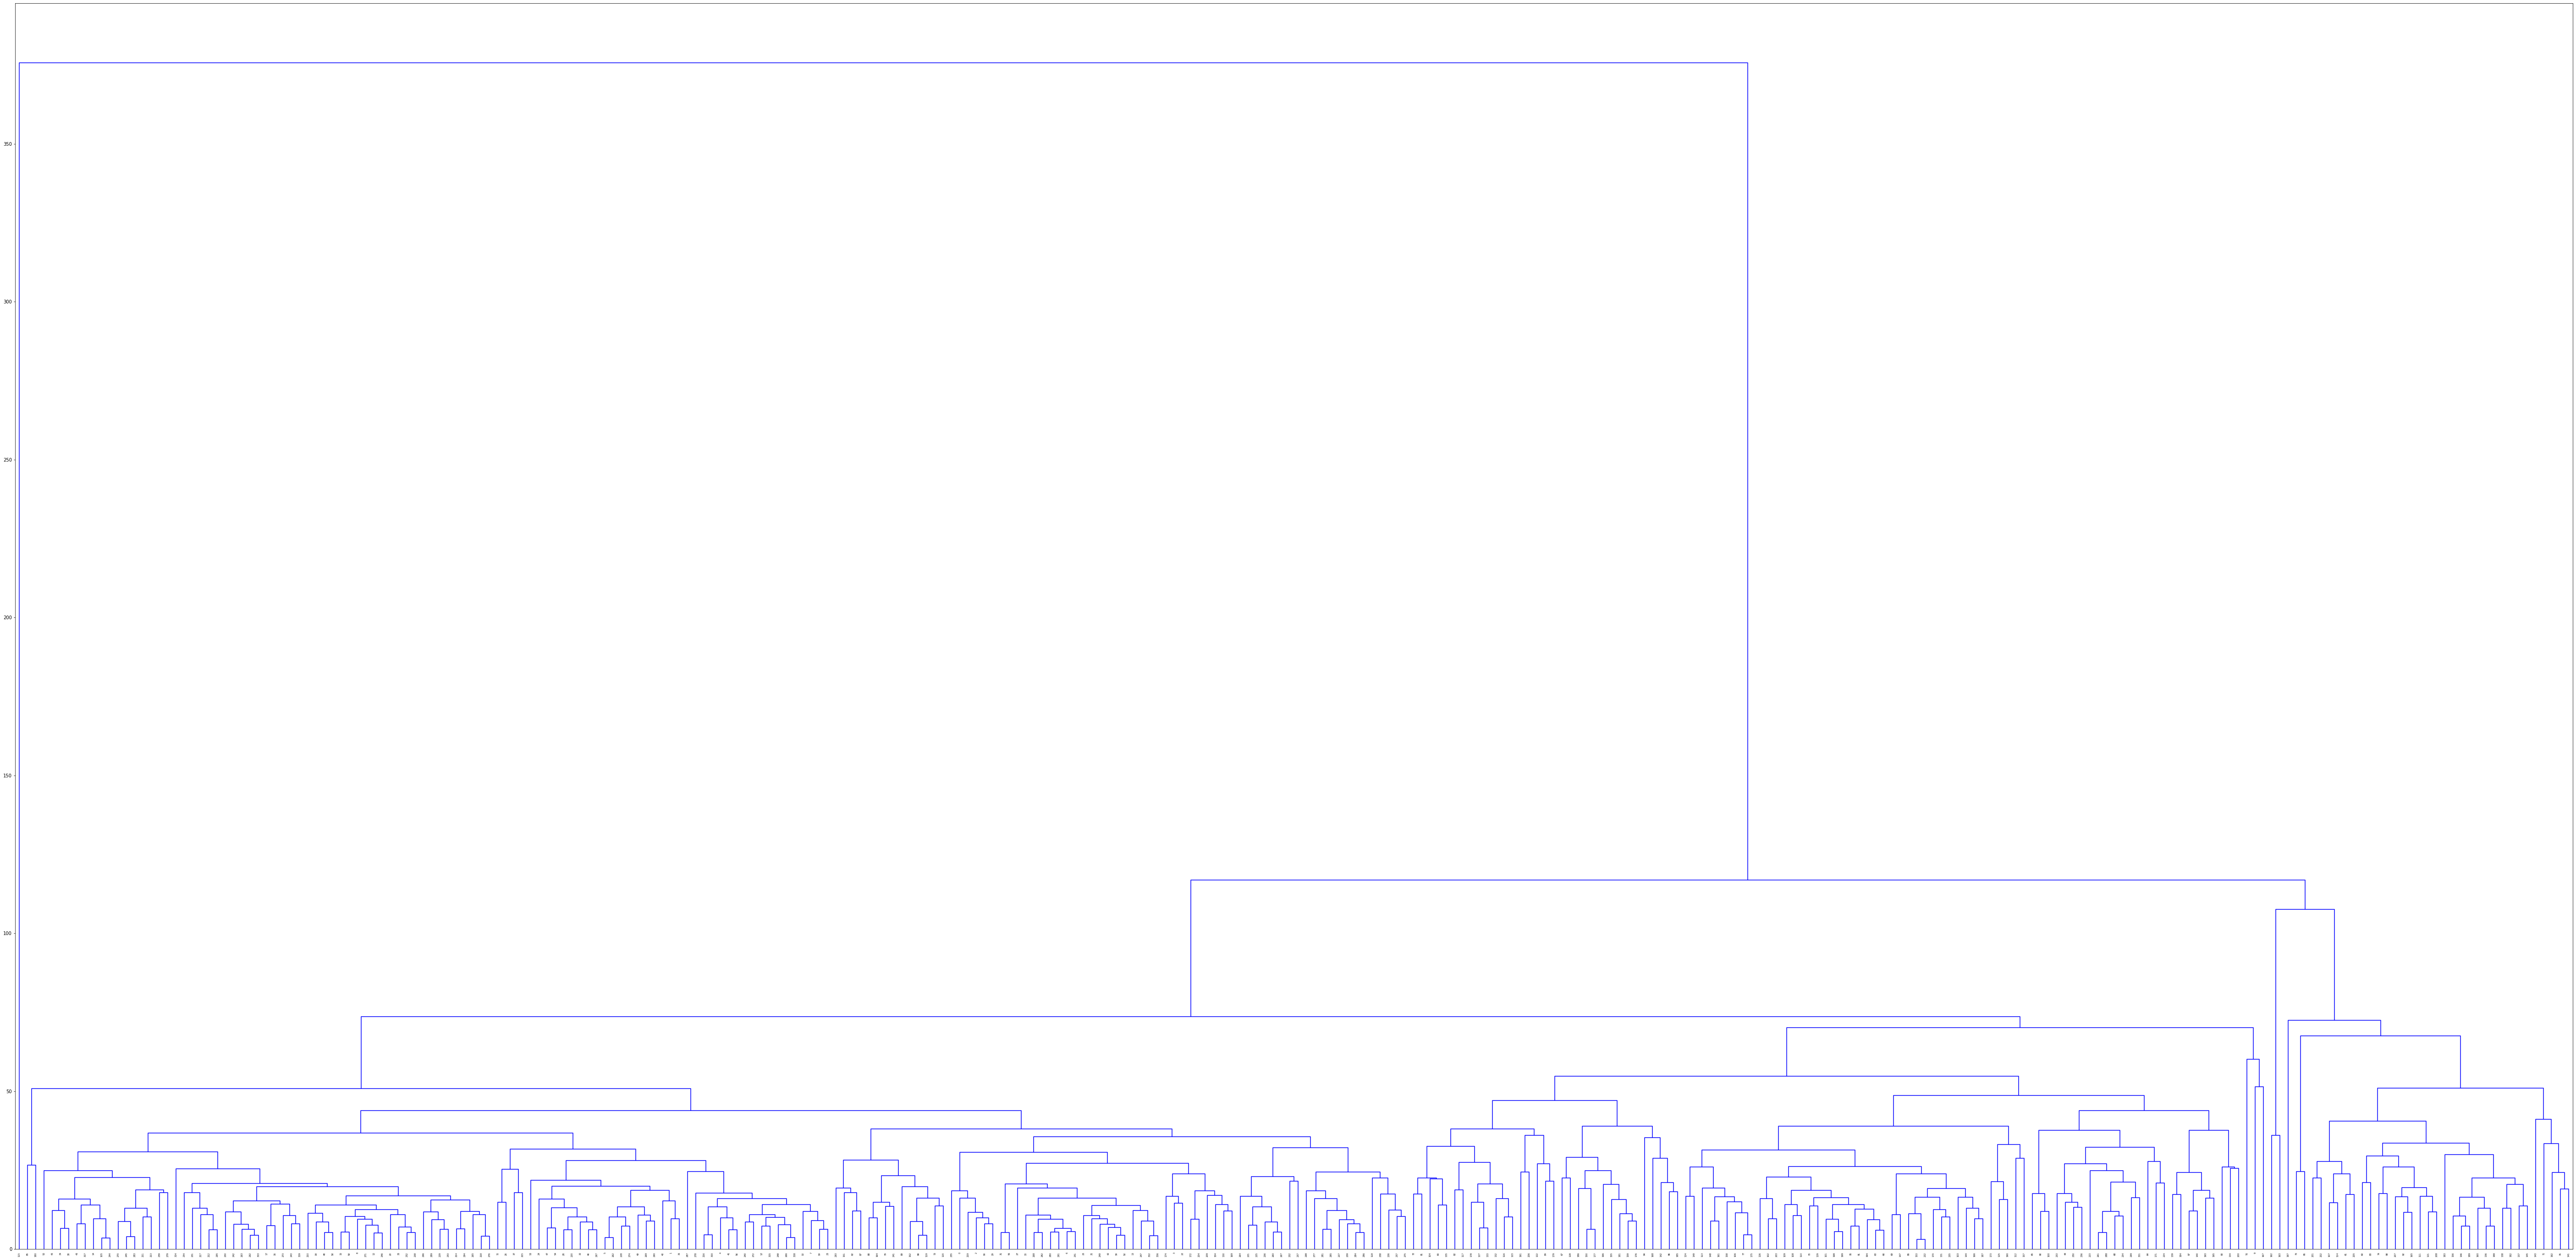

In [113]:
distance_mat = pdist(osteo_data_without_class)
Z = hierarchy.linkage(distance_mat, 'weighted')
plt.figure(figsize=(100, 50))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

На первый взгляд лучше всего кластеризует ward метод.

## 6. Сравните метрики качества модели (ARI, AMI, HomogenityCompleteness, V-measure, Silhouette). На основании полученных метрик сделайте вывод о том, какой алгоритм использовать лучше всего 

In [123]:
algorithms = []
algorithms.append(KMeans(n_clusters=4,  n_init=10, init='random', max_iter=100000))
algorithms.append(AgglomerativeClustering(n_clusters=4))

data = []
for algo in algorithms:
    algo.fit(osteo_data_without_class)
    data.append(({
        'ARI': metrics.adjusted_rand_score(osteo_data['class'], algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(osteo_data['class'], algo.labels_),
        'Homogenity': metrics.homogeneity_score(osteo_data['class'], algo.labels_),
        'Completeness': metrics.completeness_score(osteo_data['class'], algo.labels_),
        'V-measure': metrics.v_measure_score(osteo_data['class'], algo.labels_),
        'Silhouette': metrics.silhouette_score(osteo_data_without_class, algo.labels_)
    }))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI','Homogenity'
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means','Agglomerative'])

results

,ARI,AMI,HomogenityCompleteness,V-measure,Silhouette
K-means,0.305671,0.412911,NaN,0.418514,0.364113
Agglomerative,0.296364,0.383014,NaN,0.388863,0.321495


Анализ метрик показал, что K-means справляется с задачей кластеризации лучше.